# Projekt ZUM - Streszczenie tekstu

## Wstępna analiza

In [1]:
! pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")
df_train = ds['train'].to_pandas()
df_val = ds['validation'].to_pandas()
df_test = ds['test'].to_pandas()

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [4]:
import pandas as pd

pd.set_option('display.max_colwidth', 500)

df_train

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, ...",Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the mo...","Mentally ill inmates in Miami are housed on the ""forgotten floor""\nJudge Steven Leifman says most are there as a result of ""avoidable felonies""\nWhile CNN tours facility, patient shouts: ""I am the son of the president""\nLeifman says the system is unjust and he's fighting for change .",ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who were on the Minneapolis bridge when it collapsed told harrowing tales of survival. ""The whole bridge from one side of the Mississippi to the other just completely gave way, fell all the way down,"" survivor Gary Babineau told CNN. ""I probably had a 30-, 35-foot free fall. And there's cars in the water, there's cars on fire. The whole bridge is down."" He said his back was injured but he determined he could move around. ""I realized there was a school ...","NEW: ""I thought I was going to die,"" driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: ""I probably had a 30-, 35-foot free fall""\nMinnesota bridge collapsed during rush hour Wednesday .",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,"WASHINGTON (CNN) -- Doctors removed five small polyps from President Bush's colon on Saturday, and ""none appeared worrisome,"" a White House spokesman said. The polyps were removed and sent to the National Naval Medical Center in Bethesda, Maryland, for routine microscopic examination, spokesman Scott Stanzel said. Results are expected in two to three days. All were small, less than a centimeter [half an inch] in diameter, he said. Bush is in good humor, Stanzel said, and will resume his acti...","Five small polyps found during procedure; ""none worrisome,"" spokesman says .\nPresident reclaims powers transferred to vice president .\nBush undergoes routine colonoscopy at Camp David .",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,"(CNN) -- The National Football League has indefinitely suspended Atlanta Falcons quarterback Michael Vick without pay, officials with the league said Friday. NFL star Michael Vick is set to appear in court Monday. A judge will have the final say on a plea deal. Earlier, Vick admitted to participating in a dogfighting ring as part of a plea agreement with federal prosecutors in Virginia. ""Your admitted conduct was not only illegal, but also cruel and reprehensible. Your team, the NFL, and NF...","NEW: NFL chief, Atlanta Falcons owner critical of Michael Vick's conduct .\nNFL suspends Falcons quarterback indefinitely without pay .\nVick admits funding dogfighting operation but says he did not gamble .\nVick due in federal court Monday; future in NFL remains uncertain .",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
...,...,...,...
2871

In [5]:
# wyświetlanie przykładowej pary tekst - streszczenie
df_train.head(1)[["article", "highlights"]]

,article,highlights
0,"LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, ...",Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .


In [6]:
# średnia długość tekstu i średnia długość streszczeń
import numpy as np

def words_count(text):
    return len(text.split())

text_len = [words_count(x) for x in df_train["article"]]
summary_len = [words_count(x) for x in df_train["highlights"]]

print(f"średnia długość tekstu (wyrazy): {np.mean(text_len)}")
print(f"średnia długość streszczeń (wyrazy): {np.mean(summary_len)}")

średnia długość tekstu (wyrazy): 691.8703263175126
średnia długość streszczeń (wyrazy): 51.574101486174435


In [7]:
ratios = [s_len / t_len for s_len, t_len in zip(summary_len, text_len)]
print(f"Średnia proporcja długości streszczeń do tekstów: {np.mean(ratios):.2f}")


Średnia proporcja długości streszczeń do tekstów: 0.09


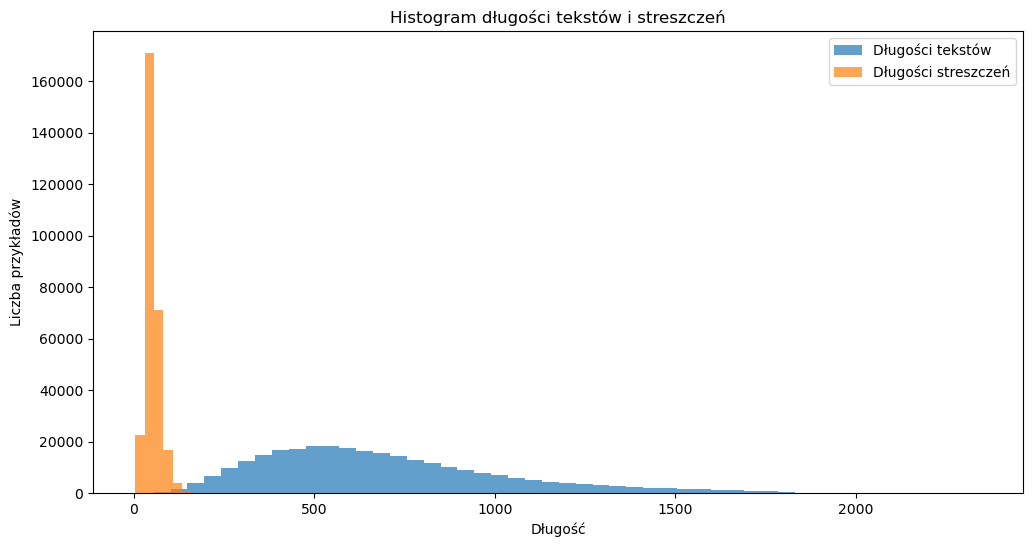

In [8]:
import matplotlib.pyplot as plt

# Histogramy
plt.figure(figsize=(12, 6))
plt.hist(text_len, bins=50, alpha=0.7, label="Długości tekstów")
plt.hist(summary_len, bins=50, alpha=0.7, label="Długości streszczeń")
plt.legend()
plt.title("Histogram długości tekstów i streszczeń")
plt.xlabel("Długość")
plt.ylabel("Liczba przykładów")
plt.show()


In [9]:
# Najdłuższy i najkrótszy artykuł
longest_article = max(df_train["article"], key=lambda x: words_count(x))
shortest_article = min(df_train["article"], key=lambda x: words_count(x))

print(f"Najdłuższy artykuł (liczba słów: {words_count(longest_article)}):\n{longest_article[:500]}...\n")
print(f"Najkrótszy artykuł (liczba słów: {words_count(shortest_article)}):\n{shortest_article[:500]}\n")

# Najdłuższe i najkrótsze streszczenie
longest_summary = max(df_train["highlights"], key=lambda x: words_count(x))
shortest_summary = min(df_train["highlights"], key=lambda x: words_count(x))

print(f"Najdłuższe streszczenie (liczba słów: {words_count(longest_summary)}):\n{longest_summary[:500]}...\n")
print(f"Najkrótsze streszczenie (liczba słów: {words_count(shortest_summary)}):\n{shortest_summary[:500]}\n")

Najdłuższy artykuł (liczba słów: 2347):
Taylor Swift has won hundreds of awards, but she'll likely never forget her 2009 Best Female Video at the MTV Video Music Awards. Rapper Kanye West rushed the stage, stealing the microphone from the unsuspecting singer and insisting fellow nominee Beyonce had 'one of the best videos of all time.' However, six years later the two seemed chummy as they posed backstage at the 57th Grammy Awards in Los Angeles. Scroll down for video . Reconciled: It looks like all is good between Kanye West (L) and ...

Najkrótszy artykuł (liczba słów: 8):
Downton Abbey's famously grim butler, Mr Bates .

Najdłuższe streszczenie (liczba słów: 1296):
The Great British Bake Off final expects to draw an audience of over 4 million tonight .
27% of Britons say they will bake more in the next year .
National Baking Week runs 15th -21st October .
Baking is most popular in Yorkshire .
1 in 7 adults bake at least twice a week .
Servants leave for the First World War and work 

In [10]:
from collections import Counter

# Tokenizacja i liczenie słów
df_train['article_word_count'] = df_train['article'].apply(lambda x: words_count(x))
df_train['summary_word_count'] = df_train['highlights'].apply(lambda x: words_count(x))

# Najczęściej występujące słowa w streszczeniach
all_summaries = " ".join(df_train['highlights'])
word_counts = Counter(all_summaries.split())
print(word_counts.most_common(10))


[('.', 1015124), ('the', 444655), ('to', 364393), ('in', 319378), ('of', 286552), ('and', 259113), ('a', 255196), ('for', 141765), ('was', 141272), ('on', 136010)]


## Inżynieria cech

In [11]:
import re

def clean_text(text):
  text = re.sub(r'http[s]?://\S+', '', text)
  text = text.strip().replace('\n', ' ').replace('\r', ' ')
  text = re.sub(r'\s+', ' ', text)
  return text

train_data = ds['train']
train_data = train_data_map = train_data.map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
val_data = ds['validation'].map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})
test_data = ds['test'].map(lambda x: {'article': clean_text(x['article']), 'highlights': clean_text(x['highlights'])})

train_data[:2], val_data[:2], test_data[:2]

({'article': ['LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office ch

In [12]:
! pip install transformers torch

In [13]:
from transformers import AutoTokenizer

model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_data(examples):
    inputs = [f"summarize: {article}" for article in examples['article']]
    targets = examples['highlights']

    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding="max_length"
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=150,
            truncation=True,
            padding="max_length"
        )

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_data_tokenized = train_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

val_data_tokenized = val_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

test_data_tokenized = test_data.map(
    tokenize_data,
    batched=True,
    remove_columns=['article', 'highlights'],
    batch_size=1000
)

train_data_tokenized = train_data_tokenized.with_format("torch")
val_data_tokenized = val_data_tokenized.with_format("torch")
test_data_tokenized = test_data_tokenized.with_format("torch")

print(train_data_tokenized[0])

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

/Applications/anaconda3/envs/exercises/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'id': '42c027e4ff9730fbb3de84c1af0d2c506e41c3e4', 'input_ids': tensor([21603,    10,   301, 24796,  4170,     6,  2789,    41, 18844,    61,
         1636,  8929, 16023,  2213,  4173,  6324, 12591,    15, 11391,   592,
           12,     3,     9,  2196,  3996,  1755,   770,  8785,   591, 11039,
          770,    61, 13462,    38,     3,    88,  5050,   507,    30,  2089,
            6,    68,     3,    88, 10419,     7,     8,   540,   751,    31,
           17,  4061,     3,     9, 10783,    30,   376,     5,  4173,  6324,
        12591,    15,    38,  8929, 16023,    16,    96, 15537,   651, 16023,
           11,     8,  5197,    13,     8, 12308,   121,   304,     8, 19142,
           13, 29517,  6710,   343,     7,   300,     8,   296,     6,     8,
         1021,  7556,   845,     3,    88,    65,   150,  1390,    12,  9030,
           17,   449,   112,  1723,   550,    30,  1006,  2948,     6,  3281,
           11, 17086,  2251,     5,    96,   196,   278,    31,    17,   515,


## Model

In [14]:
! pip install -U accelerate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=0.1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=500,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data_tokenized,
    eval_dataset=val_data_tokenized,
    tokenizer=tokenizer,
)

trainer.train()

/var/folders/1g/t4vt3dys0pdd2crlz7rg06wr0000gn/T/ipykernel_17277/937237207.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


  0%|          | 0/107670 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
results = trainer.evaluate(eval_dataset=val_data_tokenized)
print(results)

In [ ]:
test_results = trainer.evaluate(eval_dataset=test_data_tokenized)
print(test_results)

In [ ]:
# Generating predictions for the test dataset
test_sample = test_data_tokenized[0]
input_ids = test_sample['input_ids']
outputs = model.generate(input_ids=input_ids.unsqueeze(0), max_length=150)

# Decode predictions
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(decoded_output)

In [ ]:
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")